1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

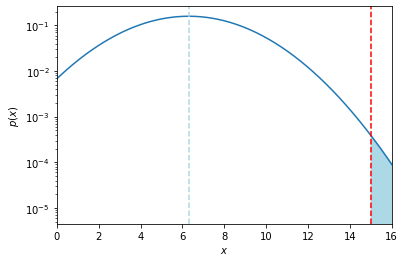

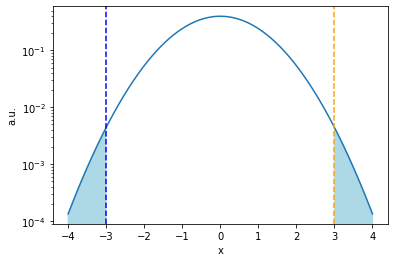

p-value = 0.0013498980316301035

The probability to observe more then 15 hurricanes is  smaller then  𝛼=0.05. So it's safe to reject the null hypothesis.


In [1]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

x0 = 15
mu = 6.3
sigma = sqrt(6.3)
Z = 3 

# plot the measurement and its assumed pdf
w =np.abs( mu - x0)
x = np.linspace(mu - w - sigma, w + mu + sigma, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
plt.xlim(0,16)
plt.fill_between(x, y, where=x - mu > w, color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.yscale("log")
plt.show()

# plot the test statistics and its pdf
xs = np.linspace(-4, +4, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.yscale("log")
plt.show()


# calculate the p-value as the sum of the left tail + the right tail
pvalue = (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)

print("\nThe probability to observe more then 15 hurricanes is  smaller then  𝛼=0.05. So it's safe to reject the null hypothesis.")



2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [2]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma1 = np.sqrt(np.var(pre, ddof=1))
sigma2 = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma1**2 + sigma2**2)/2)
sample_mean1 = np.mean(pre)
sample_mean2 = np.mean(post)
n = len(pre)

# calculate the test statistics
T = (sample_mean1-sample_mean2) / (sigma *np.sqrt(2/n))
print("T =", T)

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, 2*n - 2) + (1. - stats.t.cdf(-T, 2*n - 2))
print("p-value =", pvalue, "\nthe p-value is lower than alpha=0.05. So it's safe to reject the null hypothesis, this means that the change in blood pressures is not significant, according with this statistic method.")


T = -3.786997938137629
p-value = 0.0013499418313276546 
the p-value is lower than alpha=0.05. So it's safe to reject the null hypothesis, this means that the change in blood pressures is not significant, according with this statistic method.


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

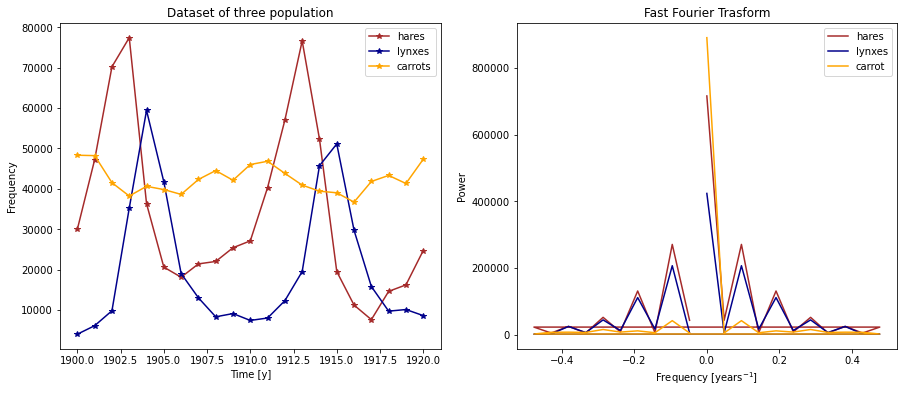

peak frequency for hares: 0.09523809523809523  The period of population is: 10.5 years
peak frequency for lynxes: 0.09523809523809523  The period of population is: 10.5 years
peak frequency for carrots: 0.09523809523809523  The period of population is: 10.5 years


*****From the cleared signal we can see the period of about 10 year for each one of populations******


/home/valentina/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/valentina/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/valentina/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


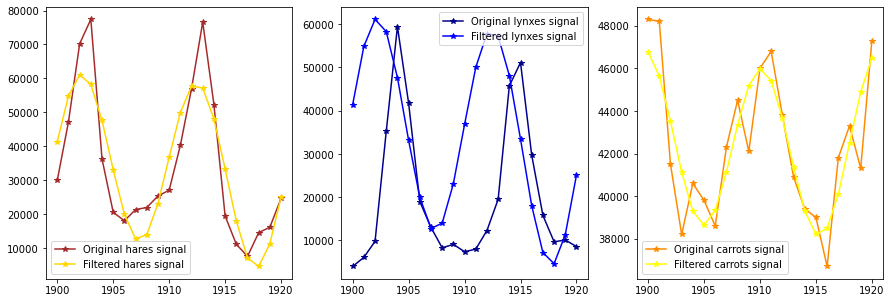

In [3]:
from scipy import fftpack
import pandas as pd

data = np.loadtxt('populations.txt')
year, hare, lynx, carrot = data.T

fig, ax=plt.subplots(1,2,figsize=(15,6))
ax[0].plot(year,hare,'*-',color='brown',label='hares')
ax[0].plot(year,lynx,'*-',color='darkblue',label='lynxes')
ax[0].plot(year,carrot,'*-',color='orange',label='carrots')
ax[0].legend()
ax[0].set_xlabel('Time [y]')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Dataset of three population')

hare_fft= fftpack.fft(hare)
power_hare = np.abs(hare_fft)
sample_freq_hare= fftpack.fftfreq(len(hare))

lynx_fft= fftpack.fft(lynx)
power_lynx = np.abs(lynx_fft)
sample_freq_lynx = fftpack.fftfreq(len(lynx))

carrot_fft= fftpack.fft(carrot)
power_carrot = np.abs(carrot_fft)
sample_freq_carrot= fftpack.fftfreq(len(carrot))

ax[1].plot(sample_freq_hare, power_hare, c='brown', label="hares")
ax[1].plot(sample_freq_lynx, power_lynx, c='darkblue', label="lynxes")
ax[1].plot(sample_freq_lynx, power_carrot, c='orange', label="carrot")
ax[1].set_xlabel('Frequency [years$^{-1}$]')
ax[1].set_ylabel('Power')
ax[1].set_title('Fast Fourier Trasform')
ax[1].legend()
plt.show()

                                    #find the peaks
    
freqs_hare = sample_freq_hare[sample_freq_hare > 0]
powes_hare = power_hare[sample_freq_hare > 0]
peak_freq_hare = freqs_hare[powes_hare.argmax()] 
print("peak frequency for hares:",peak_freq_hare, " The period of population is:", 1/peak_freq_hare, "years")

freqs_lynx = sample_freq_lynx[sample_freq_lynx > 0]
powes_lynx = power_lynx[sample_freq_lynx > 0]
peak_freq_lynx = freqs_lynx[powes_lynx.argmax()] 
print("peak frequency for lynxes:",peak_freq_lynx, " The period of population is:", 1/peak_freq_lynx, "years")

freqs_carrot = sample_freq_carrot[sample_freq_carrot > 0]
powes_carrot = power_carrot[sample_freq_carrot > 0]
peak_freq_carrot = freqs_carrot[powes_carrot.argmax()] 
print("peak frequency for carrots:",peak_freq_carrot, " The period of population is:", 1/peak_freq_carrot, "years")

                                    #clear signal
    
high_freq_fft_hare = hare_fft.copy()
high_freq_fft_hare[np.abs(sample_freq_hare) > peak_freq_hare] = 0
filtered_hare = fftpack.ifft(high_freq_fft_hare)

high_freq_fft_lynx = hare_fft.copy()
high_freq_fft_lynx[np.abs(sample_freq_lynx) > peak_freq_lynx] = 0
filtered_lynx = fftpack.ifft(high_freq_fft_lynx)

high_freq_fft_carrot = carrot_fft.copy()
high_freq_fft_carrot[np.abs(sample_freq_carrot) > peak_freq_carrot] = 0
filtered_carrot = fftpack.ifft(high_freq_fft_carrot)


fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(year,hare,'*-',color='brown',label='Original hares signal')
ax[0].plot(year,filtered_hare,'*-',color='gold',label='Filtered hares signal')
ax[0].legend()

ax[1].plot(year,lynx,'*-',color='darkblue',label='Original lynxes signal')
ax[1].plot(year,filtered_lynx,'*-',color='blue',label='Filtered lynxes signal')
ax[1].legend()

ax[2].plot(year,carrot,'*-',color='darkorange',label='Original carrots signal')
ax[2].plot(year,filtered_carrot,'*-',color='yellow',label='Filtered carrots signal')
ax[2].legend()

print("\n\n*****From the cleared signal we can see the period of about 10 year for each one of populations******")

    

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Filtered image')

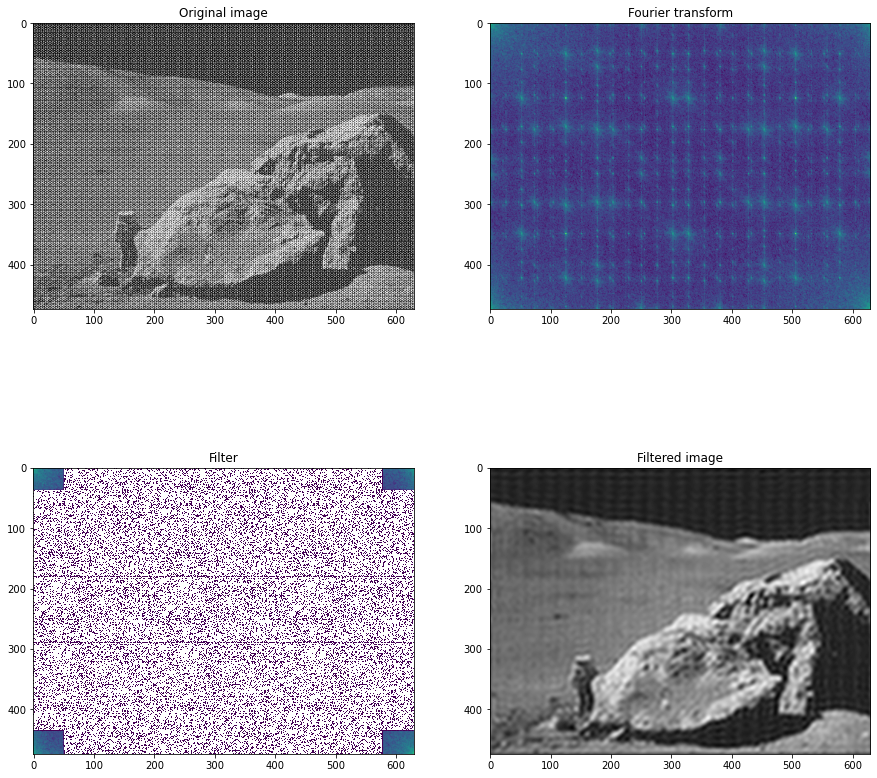

In [4]:
from scipy.fftpack import fft2, ifft2, fftfreq
from matplotlib.colors import LogNorm


fig,ax=plt.subplots(2,2,figsize=(15,15))

#plot initial noisy image
X = plt.imread("moonlanding.png").astype(float)
ax[0,0].imshow(X,plt.cm.gray)
ax[0,0].set_title('Original image')

#The 2D-TTF and its spectrum plot
Tf = fft2(X)
power = np.abs(Tf)
ax[0,1].imshow(power, norm=LogNorm(vmin=5))
ax[0,1].set_title('Fourier transform')


Tf_filt = Tf.copy()
r, c = Tf.shape
definition = 0.08

Tf_filt[int(r*definition):int(r*(1-definition))] = 0
Tf_filt[:, int(c*definition):int(c*(1-definition))] = 0

ax[1,0].imshow(np.abs(Tf_filt), norm=LogNorm(vmin=5))
ax[1,0].set_title('Filter')

X_filt = fftpack.ifft2(Tf_filt).real
ax[1,1].imshow(X_filt, plt.cm.gray)
ax[1,1].set_title('Filtered image')

